<a href="https://colab.research.google.com/github/camilabarg/ImagensAnomaliaFMC/blob/main/FMCtasCMIP6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FMCtasCMIP6

O cartopy gosta de dar problemas!

In [ ]:
!pip install --upgrade  xarray zarr gcsfs cftime nc-time-axis 
!pip install git+https://github.com/SciTools/cartopy.git
!pip uninstall -y shapely;    
!pip install shapely --no-binary shapely;
!pip install cartopy
import cartopy
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shpreader
GeoAxes._pcolormesh_patched = Axes.pcolormesh
#import cartopy
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
fig = plt.figure(figsize=(15, 8))
from cartopy.feature import NaturalEarthFeature #Tem dias que não funciona >> https://www.naturalearthdata.com

  Cloning https://github.com/SciTools/cartopy.git to /tmp/pip-req-build-kyrq6uo3
  Running command git clone -q https://github.com/SciTools/cartopy.git /tmp/pip-req-build-kyrq6uo3
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/in_process/_in_process.py get_requires_for_build_wheel /tmp/tmpkz8iis4j Check the logs for full command output.
Found existing installation: Shapely 1.7.1
Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1
  Using cached Shapely-1.7.1.tar.gz (383 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.

<Figure size 1080x576 with 0 Axes>

## Arquivo CMIP6


In [ ]:
lista_de_modelos = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
modelos=lista_de_modelos.query("table_id=='Amon' | table_id=='fx'" )
%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


Filtrando dados. Termos > https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q
1880-01 até 2014-12. 

In [ ]:
parametros="experiment_id == 'ssp585' & source_id == 'EC-Earth3' & variable_id == 'tas'"
modelo_tas = modelos.query(parametros )
modelo_tas

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
407313,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r6i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
407470,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r13i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
407621,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r11i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
407640,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r15i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
408350,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r9i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
422031,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200310
426460,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r132i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412
426538,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r133i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412
426543,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r142i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412
426565,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r130i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412


## Carregar dados


In [ ]:
# isso só precisa ser criado uma vez
gcs = gcsfs.GCSFileSystem(token='anon')

# obter o caminho para um armazenamento zarr específico (o primeiro do dataframe acima)
zstore = modelo_tas.zstore.values[0]
zstore
# criar uma interface de estilo de mapeamento mutável para a loja
mapper = gcs.get_mapper(zstore)

# abra usando xarray e zarr
ds = xr.open_zarr(mapper, consolidated=True)
df=ds.tas.to_dataframe()

In [ ]:
def temperatura(mod):
  pd_tas_timeseries=mod.tas.to_pandas() # Transformando xarray para pandas
  tasm=pd_tas_timeseries.loc['1951-01':'1980-12'].mean() #Calculando a média de 1950 até 1980 como no GISS_TEMP
  return tasm # Temperatura média do modelo
def anomalias(mod):
  pd_tas_timeseries=mod.tas.to_pandas()
  pd_atas_timeseries=pd_tas_timeseries- temperatura(mod)
  ano=pd_atas_timeseries.resample("1y").median()
  yys=ano.reset_index()
  ys=yys[0] #separa a TAS
  tempo=yys['time'] #separa a data
  xx=tempo.to_list() #coloca em uma lista
  xs=np.int16([date.strftime("%Y") for date in xx]).tolist() #pegue apenas o ano e ignore o dia e mês
  plt.plot(xs, ys, label='NUIST')


In [ ]:
def get_lat_name(ds):
    for lat_name in ['lat', 'latitude']:
        if lat_name in ds.coords:
            return lat_name
    raise RuntimeError("Couldn't find a latitude coordinate")

def global_mean(ds):
    lat = ds[get_lat_name(ds)]
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

def busca(y):
  modelo_tas = modelos.query(y)
  return modelo_tas


def media12(par):

  gcs = gcsfs.GCSFileSystem(token='anon')
  modelo=busca(par)
  zstore = modelo.zstore.values[0]
  mapper = gcs.get_mapper(zstore)
  ds = xr.open_zarr(mapper, consolidated=True)
  df=ds.tas.to_dataframe()
  G= global_mean(ds) - 273
  plt.plot(G.time, G.tas)
  Med12= G.rolling(time=12).mean()
  plt.plot(Med12.time, Med12.tas)
  return Med12

In [ ]:

def america(mod):
  ds= mod
  min_lon = -88.0
  min_lat = -60.0
  max_lon = -30.0
  max_lat = 14
  min_lon = min_lon+360
  max_lon = max_lon+360
  mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
  mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)
  ams_tair = ds.tas.where(mask_lon & mask_lat, drop=True)
  return ams_tair

def america12(t):
  ds=america(t)
  G= global_mean(ds) - 273
  #plt.plot(G.time, G.tas)
  Med12= G.rolling(time=12).mean()
  #plt.plot(Med12.time, Med12.tas)
  return Med12

In [ ]:
def mapa(par):

  gcs = gcsfs.GCSFileSystem(token='anon')
  modelo=busca(par)
  zstore = modelo.zstore.values[0]
  mapper = gcs.get_mapper(zstore)
  ds = xr.open_zarr(mapper, consolidated=True)
  df=ds.tas.to_dataframe()
  return ds

Média

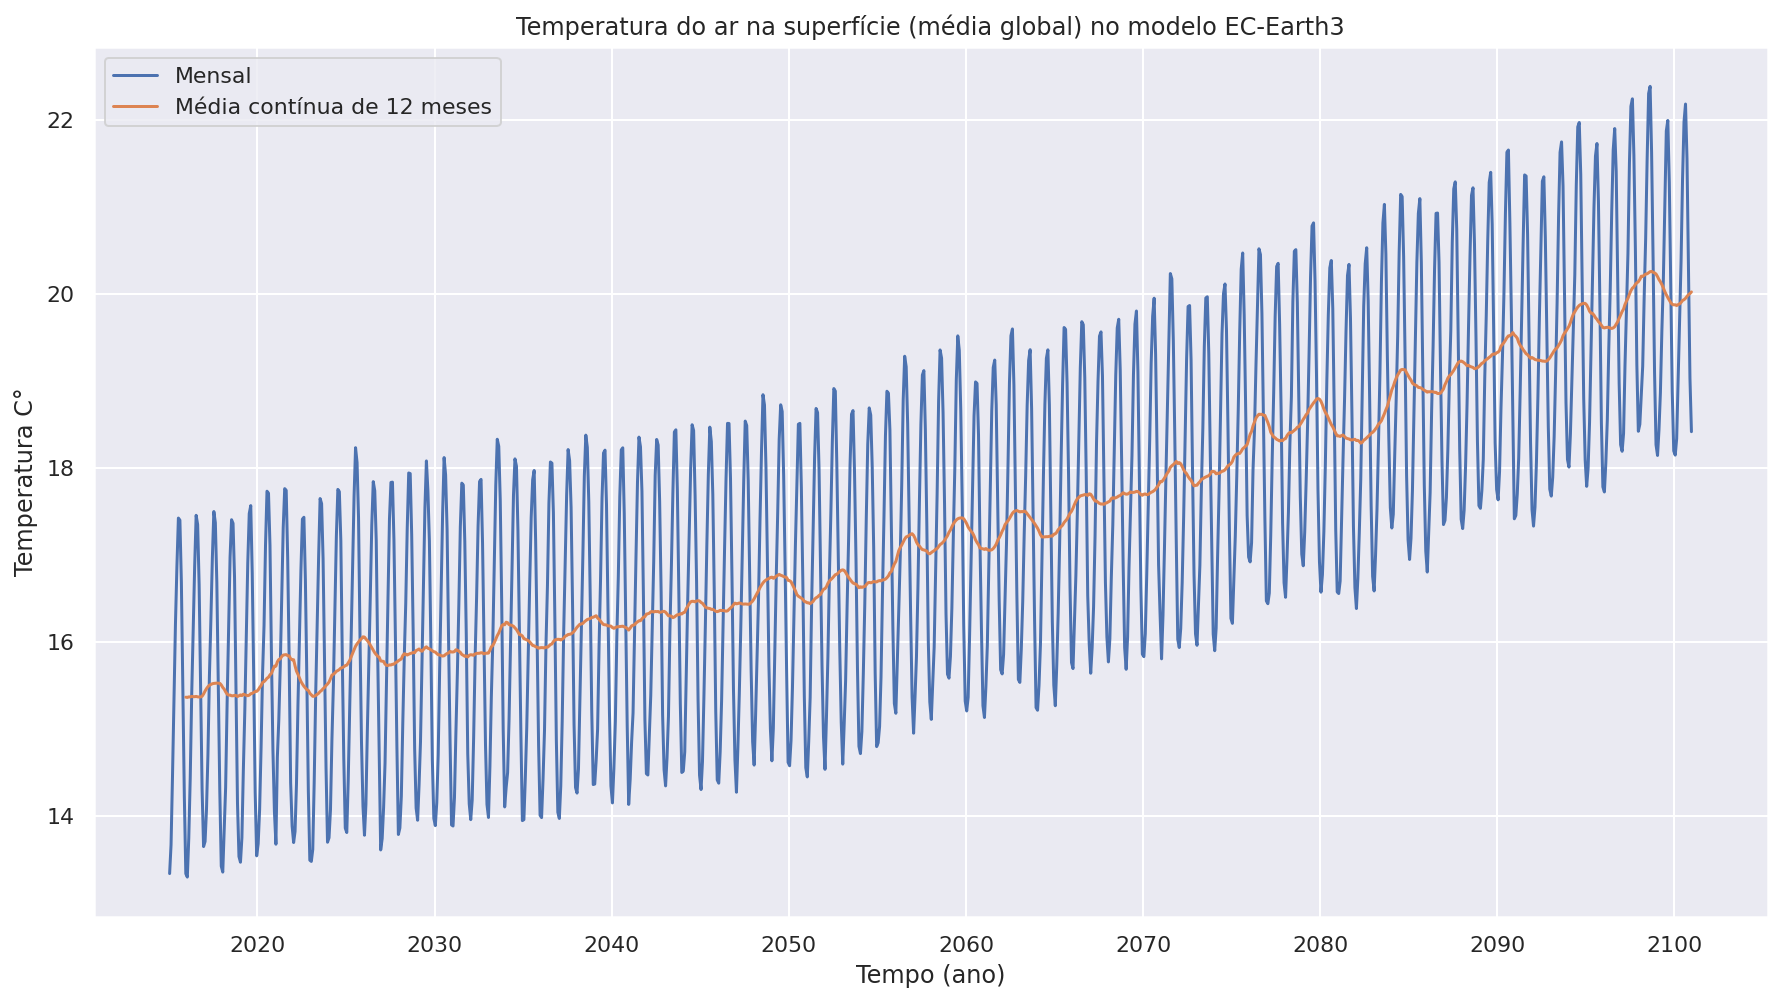

In [ ]:
sns.set_theme()
G=global_mean(ds)-273
plt.figure(figsize=(15, 8))
Med12= G.rolling(time=12).mean()
plt.xlabel('Tempo (ano)')
plt.ylabel('Temperatura C°')
plt.title('Temperatura do ar na superfície (média global) no modelo EC-Earth3')
plt.plot(G.time, G.tas,label='Mensal')
plt.plot(Med12.time, Med12.tas, label='Média contínua de 12 meses')
plt.legend()



Teste graficos xD

In [ ]:
ECEarth3_585=media12("experiment_id == 'ssp585' & source_id=='EC-Earth3' & variable_id == 'tas'")
ECEarth3_hist=media12("experiment_id == 'historical' & source_id=='EC-Earth3' & variable_id == 'tas'")
ECEarth3_126=media12("experiment_id == 'ssp126' & source_id=='EC-Earth3' & variable_id == 'tas'")
ECEarth3_anomalia= temperatura(ECEarth3)
ECEarth3_anomalia

In [ ]:
sns.set_theme()
plt.figure(figsize=(15, 8))
plt.ylim(-1, 6)
plt.plot(ECEarth3_585.time, ECEarth3_585.tas-ECEarth3_anomalia, label='ssp585', c='red')
plt.plot(ECEarth3_hist.time, ECEarth3_hist.tas-ECEarth3_anomalia, label='historical', c='black')
plt.plot(ECEarth3_126.time, ECEarth3_126.tas-ECEarth3_anomalia, label='ssp126',c='green')
plt.axhline(0, color='gray', label='Média do período 1950-1980') 
plt.xlabel('Tempo(ano)')
plt.ylabel('Anomalia de Temperatura (°C)')
plt.title('Aquecimento global no modelo EC-Earth')
plt.legend(loc="upper left")

Não utilizado, mas ta salvo

In [ ]:
# Only land temperature averages
data1 = pd.read_csv('http://github.com/adamlamee/CODINGinK12/raw/master/data/LAND.csv', header=1).replace(to_replace="***", value=np.NaN)
data_LAND_AVG = data1.apply(lambda x: pd.to_numeric(x, errors='ignore'))

# Combined land and ocean temperature averages (LOTI: Land Ocean Temperature Index)
data2 = pd.read_csv('http://github.com/adamlamee/CODINGinK12/raw/master/data/LOTI.csv', header=1).replace(to_replace="***", value=np.NaN)
data_LAND_OCEAN_AVG = data2.apply(lambda x: pd.to_numeric(x, errors='ignore'))
# The .head(n) command displays the first n rows of the file.
data_LAND_AVG.head(5)
x = data_LAND_OCEAN_AVG['Year']
y = data_LAND_OCEAN_AVG['JanDec']


In [ ]:
pd_tas_timeseries=NOAA_hist.tas.to_pandas()
pd_atas_timeseries=pd_tas_timeseries- temperatura(NOAA_hist)
CFTimeIndex=pd_atas_timeseries.index #separação da data no formato CMIP6
datetimeindex=CFTimeIndex.to_datetimeindex() #Conversão para datatime 
tas_list=pd_atas_timeseries.to_list() #Cria uma lista
new_tas_timeserie=pd.Series(data=tas_list,name='TAS',index=datetimeindex) #nova timeserie
new_tas_timeserie_year =new_tas_timeserie.resample("1y").median()
yys=new_tas_timeserie_year.loc['1880-01':'2014-12']
yys=yys.reset_index()
ys=yys['TAS'] #separa a TAS
tempo=yys['index'] #separa a data
xx=tempo.to_list() #coloca em uma lista
xs=np.int16([date.strftime("%Y") for date in xx]).tolist() #pegue apenas o ano e ignore o dia e mês

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  after removing the cwd from sys.path.


In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(xs, ys, c= 'green', label='NOAA')
plt.plot(x, y, c='black',label='GISS_TEMP')
anomalias(NUIST_hist)
plt.xlim(1880, 2014)
plt.axhline(0, color='gray', label='Média do período 1950-1980')   # tente mudar a cor. No entanto, ele só conhece alguns nomes de cores.
plt.title('Medidas e modelos')
plt.xlabel('Tempo(ano)')
plt.ylabel('Anomalia de temperatura (°C)');
plt.legend()


TAS anomalia

In [ ]:
historico=mapa("experiment_id == 'historical' & source_id=='EC-Earth3' & variable_id == 'tas'")
alto=mapa("experiment_id == 'ssp585' & source_id=='EC-Earth3' & variable_id == 'tas'")


In [ ]:

temperature_change =historico['tas'].sel(time=slice('1990','2020')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='bwr',
           vmin=-2, vmax=12, center=-5  )
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na temperatura entre 1950-1980 e 1990-2020.')



In [ ]:
temperature_change =alto['tas'].sel(time=slice('2020','2050')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-2, vmax=12, center=-5)
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na temperatura entre 1950-1980 e 2020-2050.')

Text(0.5, 1.0, 'Mudança na temperatura entre 1950-1980 e 2050-2080.')

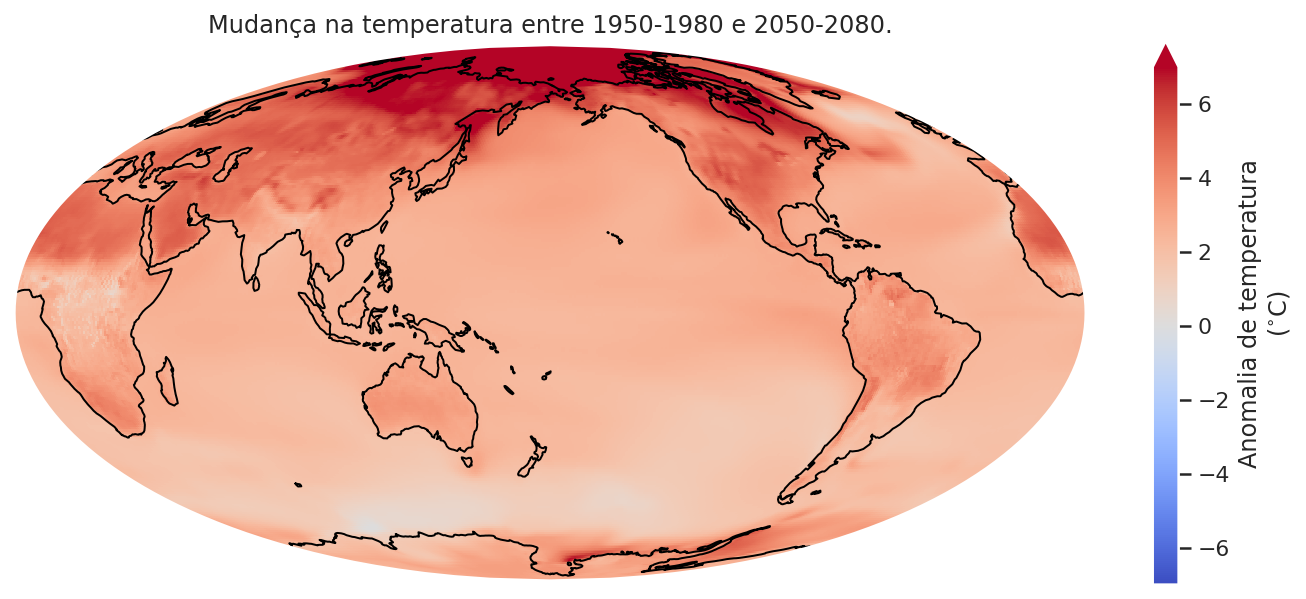

In [ ]:
temperature_change =alto['tas'].sel(time=slice('2050','2080')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='coolwarm',
           vmin=-2, vmax=12, center=-5)
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na temperatura entre 1950-1980 e 2050-2080.')

In [ ]:
temperature_change = historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')-273

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree())
p.axes.set_global()
p.axes.coastlines()
plt.title('Temperatura média do EC-Earth3 entre 1950-1980 ')

Text(0.5, 1.0, 'Mudança na temperatura entre 1950-1980 e 2070-2100.')

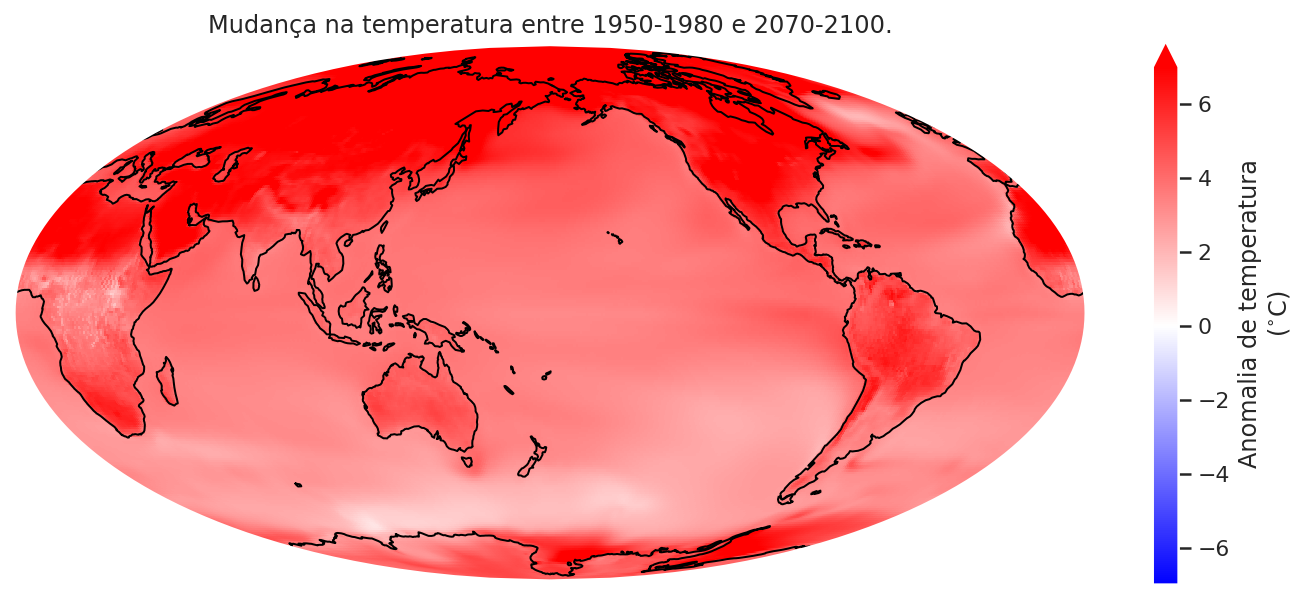

In [ ]:
temperature_change =alto['tas'].sel(time=slice('2070','2100')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='bwr',
           vmin=-2, vmax=12, center=-5)
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na temperatura entre 1950-1980 e 2070-2100.')

Comparando 'america do sul' e o resto do mundo >> tambem não utilizado


In [ ]:
historico=mapa("experiment_id == 'historical' & source_id=='NESM3' & variable_id == 'tas'")
alto=mapa("experiment_id == 'ssp245' & source_id == 'NESM3' & variable_id == 'tas'")
G=america12(historico)
H=america12(alto)
pd_tas_timeseries=G.to_pandas() # Transformando xarray para pandas
tasm=pd_tas_timeseries.loc['1951-01':'1980-12'].mean()


In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(G.time, G.values-tasm, label='América do Sul', c='green')
plt.plot(H.time, H.values-tasm, c='green')
plt.plot(NUIST_585.time, NUIST_585.tas-NUIST_anomalia, c='black')
plt.plot(NUIST_hist.time, NUIST_hist.tas-NUIST_anomalia, label='Global', c='black')
plt.axhline(0, color='gray', label='Média do período 1950-1980') 
plt.title('Aquecimento na América do Sul (ssp585)')
plt.xlabel('Tempo(ano)')
plt.ylabel('Anomalia de Temperatura (°C)');
plt.legend()


In [ ]:
GIF das anomalias


Opening the GIF..



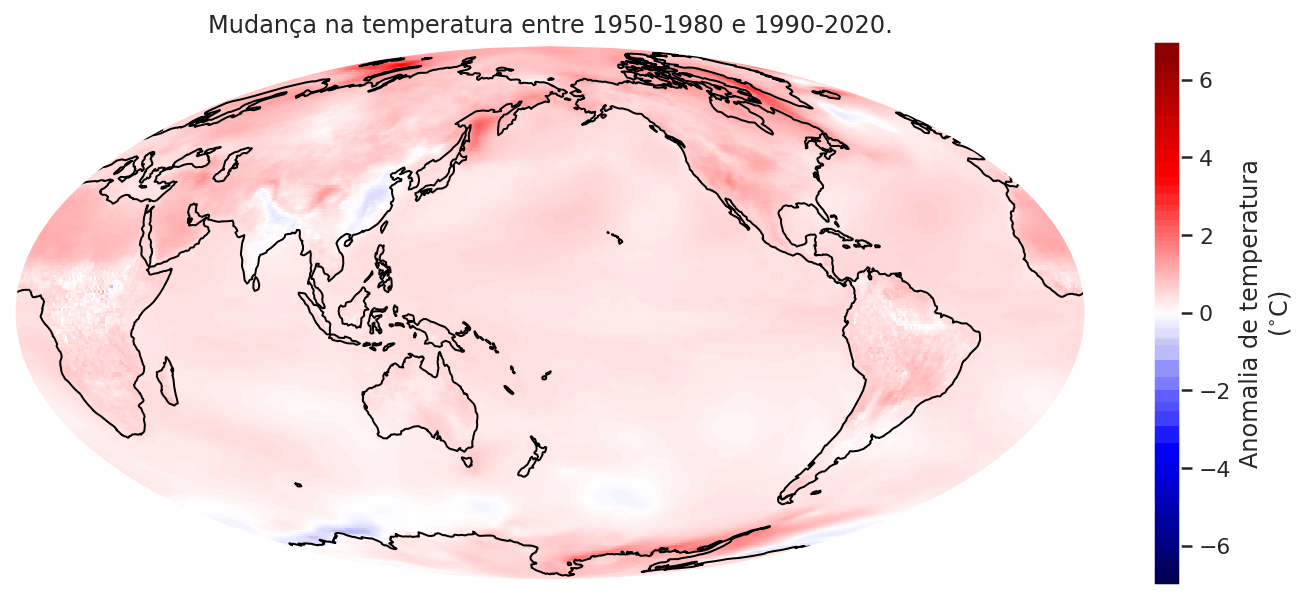

In [ ]:
import imageio 

files=['MudançaTemp50-80-90-20-EC.png','MudançaTemp50-80-20-50EC.png','MudançaTemp50-80-50-80EC.png','MudançaTemp50-80-70-100EC.png']

images=[]
for file in files:
    images.append(imageio.imread(file))
imageio.mimsave('animation.gif', images, fps=1)
print("\nOpening the GIF..\n")
from IPython.display import Image
Image(open('animation.gif','rb').read())

Alguns testes de America do sul

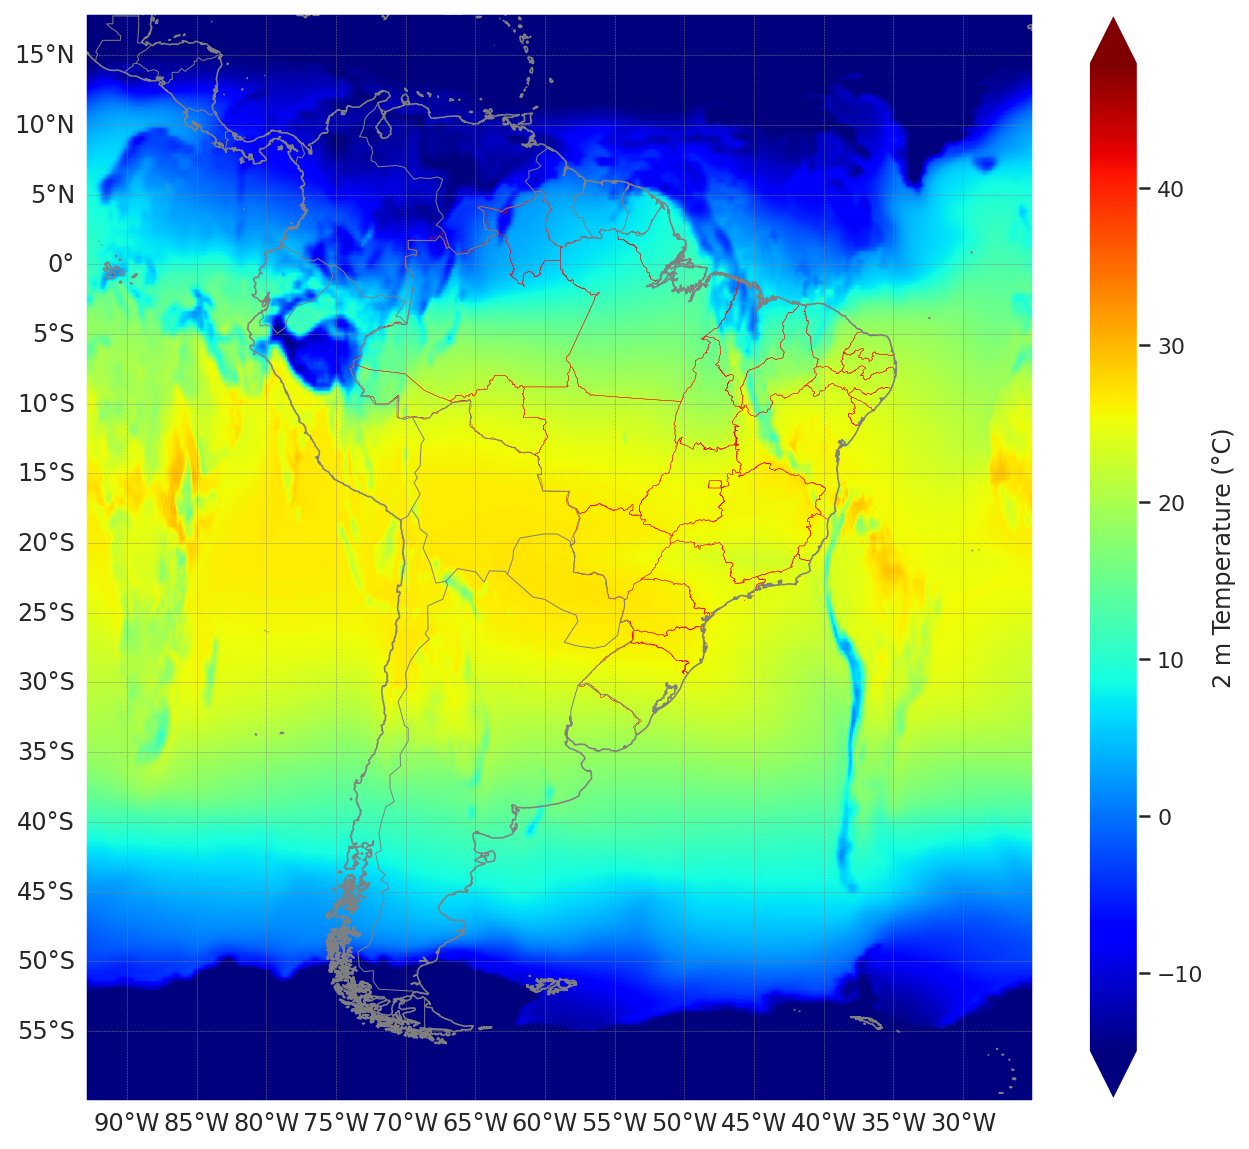

In [ ]:
# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]
# Read the data for a specific region
tmtmp= historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')


#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent [min. lon, max. lon, min. lat, max. lat]
img_extent = [extent[0], extent[2], extent[1], extent[3]]

#AddEstados
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.2)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='grey', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='grey', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-15, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)


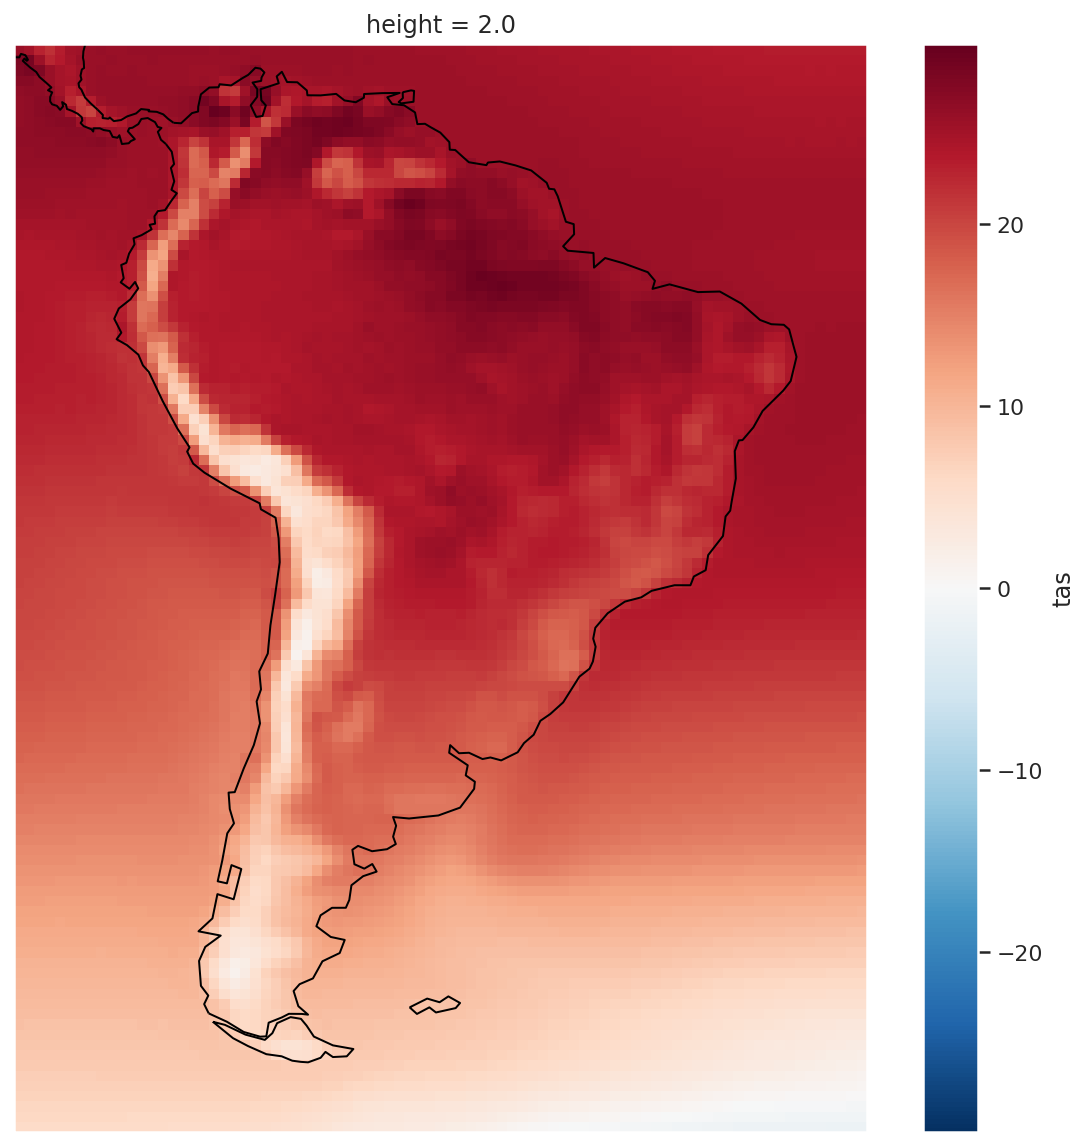

In [ ]:
tmtmp= historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')-273
plt.figure(figsize=(10,10))
min_lon = -88.0
min_lat = -60.0
max_lon = -30.0
max_lat = 14
min_lon = min_lon+360
max_lon = max_lon+360
mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)
ams_tair = tmtmp.where(mask_lon & mask_lat, drop=True)
#AddEstados
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.2)
p=ams_tair.squeeze().plot(subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=-56.0)),
    transform=ccrs.PlateCarree())
p.axes.coastlines( )
